In [247]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime


1. Loading csv file

In [248]:
#loading data
data = pd.read_csv('sleepdata.csv',sep = ';')
food = pd.read_csv('10000_recipes.csv')
#recommendationItems = pd.read_csv('recommendationItems.csv',sep =',')
df = pd.DataFrame(data)
foodDF = pd.DataFrame(food)
#print(df)

#adding temporary column day of week and MM-DD to dataframe df
df['day_of_week'] = pd.to_datetime(df['End']).dt.dayofweek
df['MM-DD'] = pd.to_datetime(df['End']).dt.strftime('%m-%d')

days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])
print(df)
print(foodDF)

                   Start                  End Sleep Quality Regularity  Mood  \
0    2019-01-02 00:04:23  2019-01-02 07:57:37           70%         0%   NaN   
1    2019-01-03 00:31:40  2019-01-03 07:40:37           65%         0%   NaN   
2    2019-01-04 00:17:13  2019-01-04 07:41:03           68%        98%   NaN   
3    2019-01-07 00:13:22  2019-01-07 07:40:04           63%        99%   NaN   
4    2019-01-08 00:21:30  2019-01-08 07:52:22           77%        97%   NaN   
..                   ...                  ...           ...        ...   ...   
468  2023-01-20 02:01:51  2023-01-20 08:01:16           66%        84%   NaN   
469  2023-01-21 03:37:34  2023-01-21 10:43:13           70%        78%   NaN   
470  2023-01-22 03:36:55  2023-01-22 10:00:27           50%        79%   NaN   
471  2023-01-23 01:32:49  2023-01-23 07:01:41           53%        72%   NaN   
472  2023-01-23 23:21:27  2023-01-24 04:59:54           58%        72%   NaN   

     Heart rate (bpm)  Steps Alarm mode

2. Statistics

In [249]:
# plot historgram of certain attribute

def showHistogram(dataframe, num_of_day, y_axis_label):
    fig, ax = plt.subplots()
    x_axis_label = "MM-DD"                     #defalut x_axis_label
    index = min(len(dataframe), num_of_day)
    shouldConvertTo_hr = False
    shouldConvertTo_min = False
    
    if(index <=7 ):
        x_axis_label = "day_of_week"
        
    if(y_axis_label == "Time asleep (seconds)" or y_axis_label == "Time in bed (seconds)"):
        shouldConvertTo_hr = True
    elif(y_axis_label == "Time before sleep (seconds)" ):
        shouldConvertTo_min = True
        
    x_values = dataframe[x_axis_label].iloc[-index:]
    y_values = dataframe[y_axis_label].iloc[-index:]
    
    if(shouldConvertTo_hr):
        y_values = y_values/60/60
    elif(shouldConvertTo_min):
        y_values = y_values/60
    
    ax.bar(x_values, y_values)
    
    if(num_of_day > 10):
        new_x = [x_values.iloc[i] for i in [-index,int((-index)//1.33),int((-index)//2),int((-index)//4),-1]]
        #print(new_x)
        ax.set_xticks(new_x)
    
    if(shouldConvertTo_hr):
        ax.set_title(y_axis_label[:-9] +"(hours)") 
    elif(shouldConvertTo_min):
        ax.set_title(y_axis_label[:-9] +"(minutes)") 
    else:
        ax.set_title(y_axis_label)


    
    

In [250]:
#SleepDuration

#AVG_OVERALL_SLEEP_DURATION
avg_sleep_duration = df["Time asleep (seconds)"].mean()    # (seconds)
print("The average of overall Sleep Duration is:", time.strftime('%H:%M:%S',time.gmtime(avg_sleep_duration)))

#Avg last 30 days SleepDuration
#print(df["Time asleep (seconds)"].iloc[-30:])             # get the last 30 rows of data with column = "Time asleep (seconds)"
last_30days_avg_sleep_duration = df["Time asleep (seconds)"].iloc[-30:].mean()
print("The average of last 30 days Sleep Duration is:", time.strftime('%H:%M:%S',time.gmtime(last_30days_avg_sleep_duration)))

#Avg Last 7days SleepDuration
last_7days_avg_sleep_duration = df["Time asleep (seconds)"].iloc[-7:].mean()
print("The average of last 7 days Sleep Duration is:", time.strftime('%H:%M:%S',time.gmtime(last_7days_avg_sleep_duration)))

#Yesterday's SleepDuration
yesterday_sleep_duration = df["Time asleep (seconds)"].iloc[-1:].mean()
print("Yesterday's Sleep Duration is:", time.strftime('%H:%M:%S',time.gmtime(yesterday_sleep_duration)))

The average of overall Sleep Duration is: 05:43:24
The average of last 30 days Sleep Duration is: 04:59:19
The average of last 7 days Sleep Duration is: 04:48:57
Yesterday's Sleep Duration is: 04:22:51


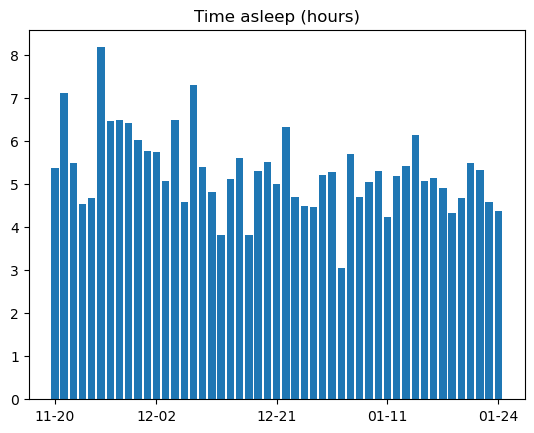

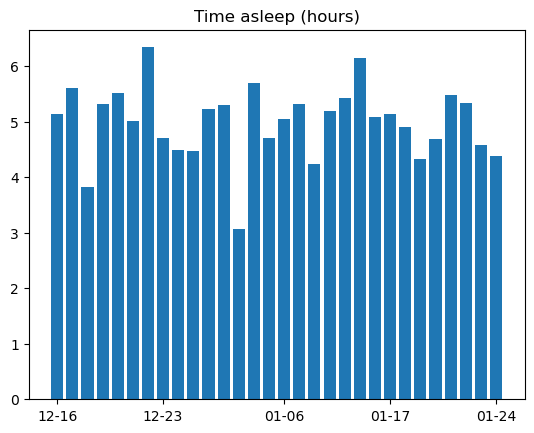

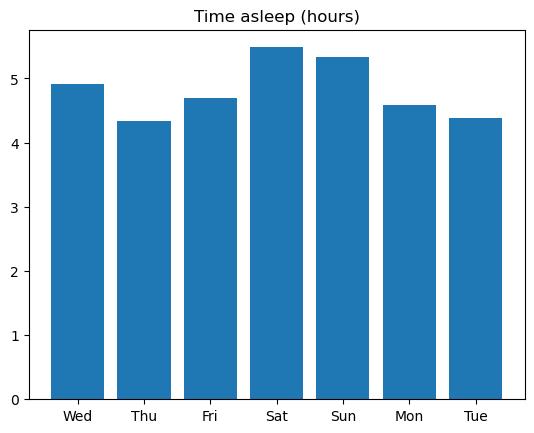

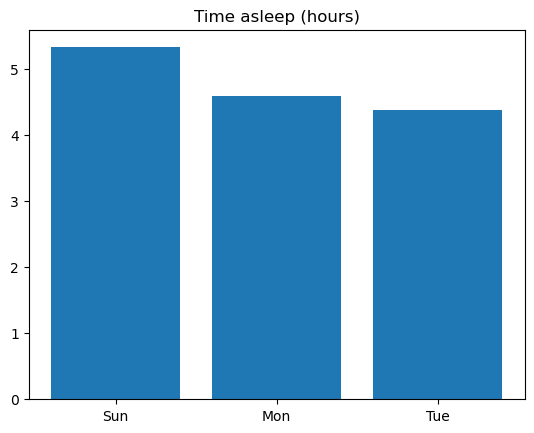

In [251]:
#histograms for sleep duration
showHistogram(df,50,"Time asleep (seconds)")
showHistogram(df,30,"Time asleep (seconds)")
showHistogram(df,7,"Time asleep (seconds)")
showHistogram(df,3,"Time asleep (seconds)")

In [252]:
#Bedtime

#Avg overall bedtime
avg_bedTime = df["Time in bed (seconds)"].mean()
print("The average of bedtime is:", time.strftime('%H:%M:%S',time.gmtime(avg_bedTime)))

#Avg last 30 days bedtime
avg_30days_bedTime = df["Time in bed (seconds)"].iloc[-30:].mean()
print("The average of last 30 days bedtime is:", time.strftime('%H:%M:%S',time.gmtime(avg_30days_bedTime)))

#Avg last 7 days bedtime
avg_7days_bedTime = df["Time in bed (seconds)"].iloc[-7:].mean()
print("The average of last 7 days bedtime is:", time.strftime('%H:%M:%S',time.gmtime(avg_7days_bedTime)))

#Yesterday's bedtime
yesterday_bedTime = df["Time in bed (seconds)"].iloc[-1:].mean()
print("Yesterday's bedtime is:",time.strftime('%H:%M:%S',time.gmtime(yesterday_bedTime)))

The average of bedtime is: 06:40:14
The average of last 30 days bedtime is: 06:11:41
The average of last 7 days bedtime is: 06:01:49
Yesterday's bedtime is: 05:38:26


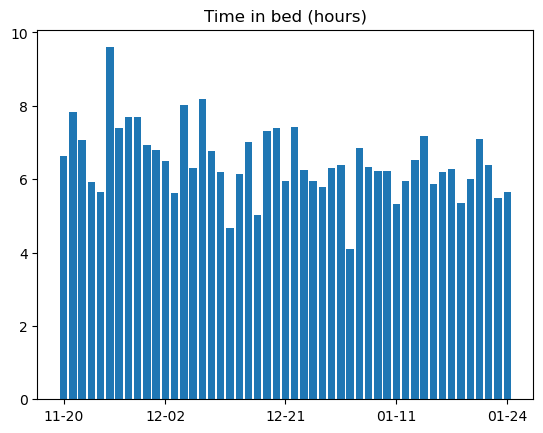

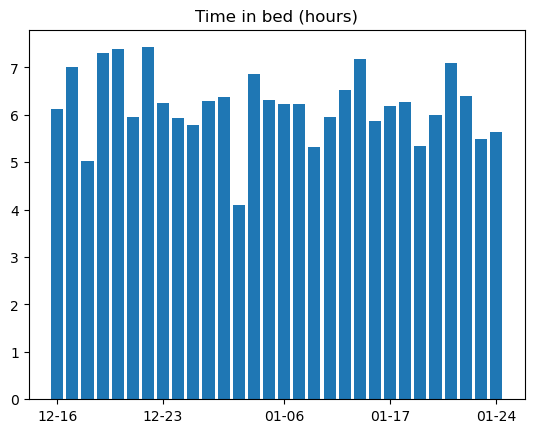

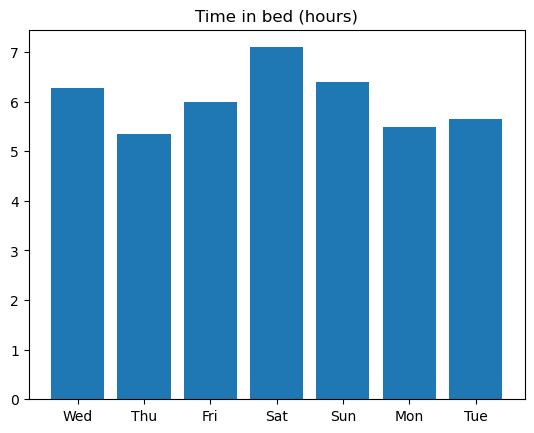

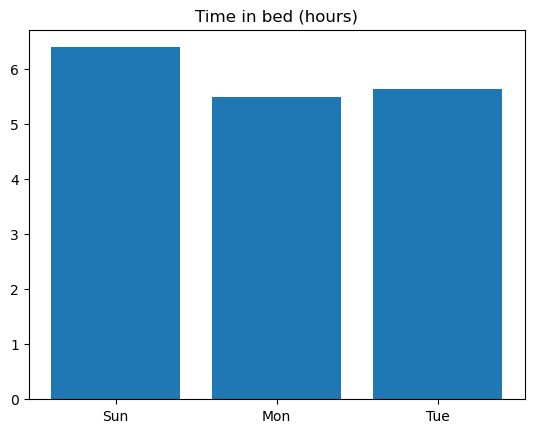

In [253]:
#histograms for bedtime
showHistogram(df,50,"Time in bed (seconds)")
showHistogram(df,30,"Time in bed (seconds)")
showHistogram(df,7,"Time in bed (seconds)")
showHistogram(df,3,"Time in bed (seconds)")

In [254]:
#Time before sleep

#Avg overall time before sleep
avg_time_before_sleep = df["Time before sleep (seconds)"].mean()
print("The average of time before sleep is:",time.strftime('%H:%M:%S',time.gmtime(avg_time_before_sleep)))

#Avg last 30 days time before sleep
avg_30days_time_before_sleep = df["Time before sleep (seconds)"].iloc[-30:].mean()
print("The average of last 30 days time before sleep is:",time.strftime('%H:%M:%S',time.gmtime(avg_30days_time_before_sleep)))

#Avg last 7 days time before sleep
avg_7days_time_before_sleep = df["Time before sleep (seconds)"].iloc[-7:].mean()
print("The average of last 7 days time before sleep is:",time.strftime('%H:%M:%S',time.gmtime(avg_7days_time_before_sleep)))

#Avg overall time before sleep
yesterday_time_before_sleep = df["Time before sleep (seconds)"].iloc[-1:].mean()
print("Yesterday's time before sleep is:",time.strftime('%H:%M:%S',time.gmtime(yesterday_time_before_sleep)))

The average of time before sleep is: 00:17:57
The average of last 30 days time before sleep is: 00:16:17
The average of last 7 days time before sleep is: 00:17:22
Yesterday's time before sleep is: 00:22:33


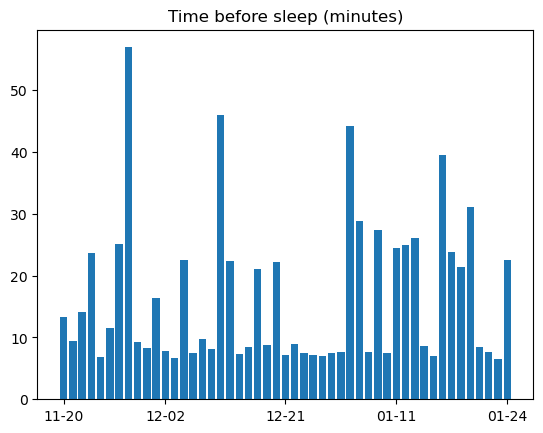

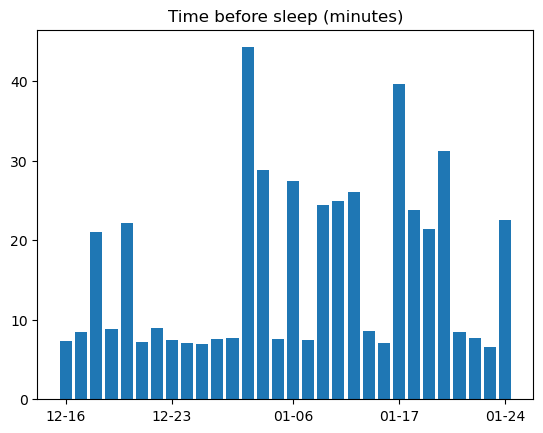

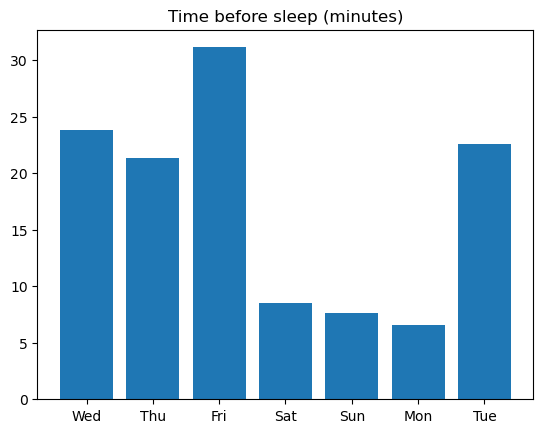

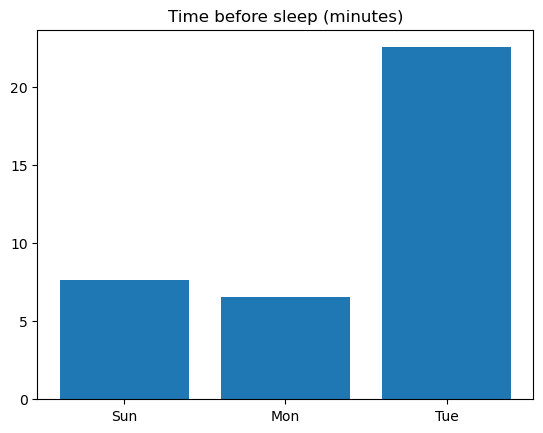

In [255]:
#histograms for time before sleep
showHistogram(df,50,"Time before sleep (seconds)")
showHistogram(df,30,"Time before sleep (seconds)")
showHistogram(df,7,"Time before sleep (seconds)")
showHistogram(df,3,"Time before sleep (seconds)")

In [256]:
#Steps

#Avg overall steps
avg_steps = df["Steps"].mean() # There are several days the steps are 0
print("The avergae of overall steps are:", int(avg_steps))

#Avg last 30 days steps
avg_30days_steps = df["Steps"].iloc[-30:].mean() 
print("The avergae of last 30 days steps are:", int(avg_30days_steps))

#Avg last 7 days steps
avg_7days_steps = df["Steps"].iloc[-7:].mean() 
print("The avergae of last 7 days steps are:", int(avg_7days_steps))

#Yesterday's steps
yesterday_steps = df["Steps"].iloc[-1:].mean() 
print("Yesterday's steps are:", int(yesterday_steps))


The avergae of overall steps are: 2792
The avergae of last 30 days steps are: 3135
The avergae of last 7 days steps are: 4419
Yesterday's steps are: 2195


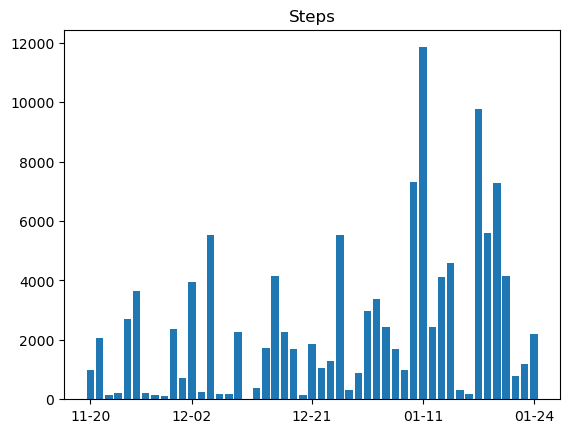

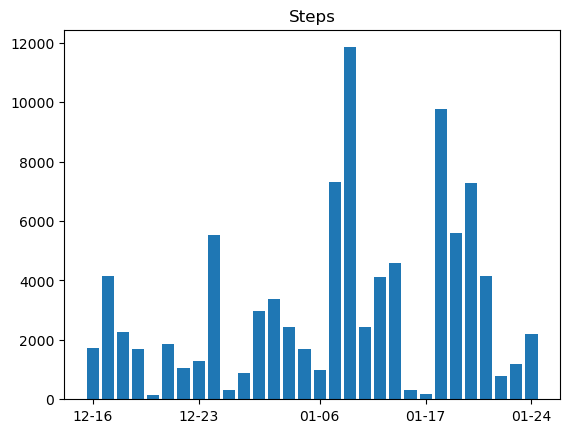

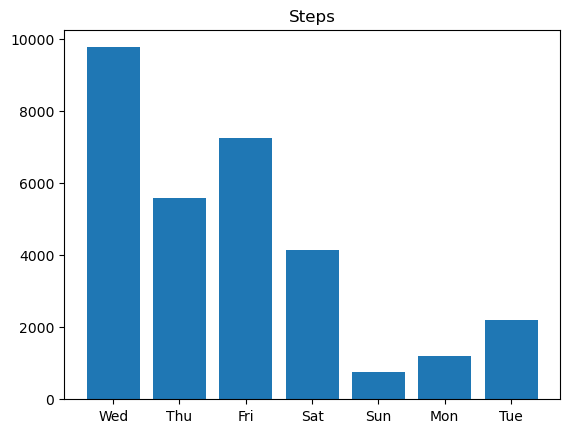

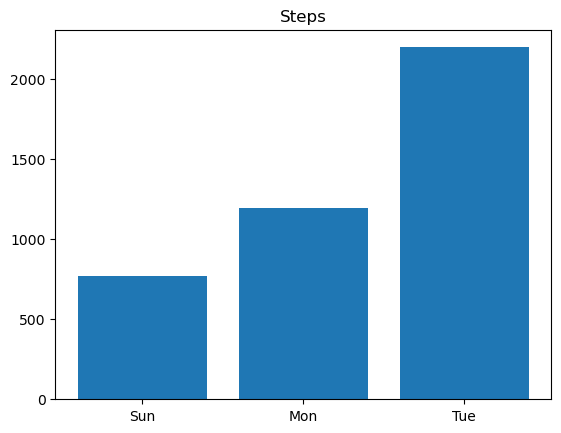

In [257]:
#histograms for steps
showHistogram(df,50,"Steps")
showHistogram(df,30,"Steps")
showHistogram(df,7,"Steps")
showHistogram(df,3,"Steps")

In [258]:
#Sleep quality

#Avg last 30 days sleep quality
avg_30days_sleep_quality = df["Sleep Quality"].iloc[-30:].str.rstrip("%").astype(float).mean()
print("The average of last 30 days sleep quality is: %.1f" % avg_30days_sleep_quality)

#Avg last 7 days sleep quality
avg_7days_sleep_quality = df["Sleep Quality"].iloc[-7:].str.rstrip("%").astype(float).mean()
print("The average of last 7 days sleep quality is: %.1f" % avg_7days_sleep_quality)

#Yesterday sleep quality
yesterday_sleep_quality = df["Sleep Quality"].iloc[-1:].str.rstrip("%").astype(float).mean()
print("Yesterday's sleep quality is: %.1f" % yesterday_sleep_quality)


The average of last 30 days sleep quality is: 59.5
The average of last 7 days sleep quality is: 59.4
Yesterday's sleep quality is: 58.0


In [259]:
#Snore counts

last_30days_snore_counts = df["Did snore"].iloc[-30:].sum()
print("Last 30 days total snore counts:",last_30days_snore_counts,"/ 30")
last_7days_snore_counts = df["Did snore"].iloc[-7:].sum()
print("Last 7 days total snore counts:",last_7days_snore_counts,"/ 7")
yesterday_snore_count = df["Did snore"].iloc[-1:].sum()
print("Did snore yesterday?",yesterday_snore_count == 1)

Last 30 days total snore counts: 30 / 30
Last 7 days total snore counts: 7 / 7
Did snore yesterday? True


3. Methods

In [260]:
# 1 sleep cycle = 90 mins = 5400 s
# 6 cycles, 9h of sleep = 32400s - recommended for long-sleepers 
# 5 cycles, 7h30m of sleep = 27000s - recommended for average-sleepers
# 4 cycles, 6h of sleep - recommended for short-sleepers
def get_idealSleepTime(sleeper,sleep_duration):
    message = []
    if(sleeper == 1 ):
        message.append("We determine you as a short sleeper.")
        if(sleep_duration<= 18000):                     #less than 5 hr of sleep
            message.append("You didn't get enough sleep last night. Get at least 6h of sleep(4 sleep cycles).")
        else:
            message.append("Keep up with your current sleep routine.")
    elif(sleeper == 2):
        message.append("We determine you as an average sleeper. ")
        if(sleep_duration<= 23400):                      #less than 6 hr and 30 mins of sleep
            message.append("You didn't get enough sleep last night. Get at least 7h and 30 mins of sleep(5 sleep cycles).")
        else:
            message.append("Keep up with your current sleep routine.")
    else:
        message.append("We determine you as a long sleeper. ")
        if(sleep_duration<= 28800):                      #less than 8 hr of sleep
            message.append("You didn't get enough sleep last night. Get at least 9h of sleep(6 sleep cycles).")
        else:
            message.append("Keep up with your current sleep routine.")
    return message
    
    

In [261]:
#Determine how active a user is
#Sedentary, less than 2,500 steps per day 
#Lightly active, 2,500 to 4,999 steps per day
#Moderately active, 5,000 to 7,499 steps per day
#Very active, more than 7,499 steps per day
#Extra active, more than 10,000 

def get_activeLevel():
    activeLevel = None
    activeScore = 0
    if(len(df) <7):
        activeLevel = 2
    else:
        for i in (df["Steps"].iloc[-7:]):
            if(i<=2500):
                activeScore += 1
            elif(i<=4999):
                activeScore += 2
            elif(i<=7499):
                activeScore += 3
            elif(i<=10000):
                activeScore += 4
            else:
                activeScore += 5
        activeLevel = round(activeScore/7)
    return activeLevel
        
    

In [262]:
def get_caloriesNeededForDinner(gender,height,weight,age,breakfast_calories,lunch_calories,activeLevel):
    BMR = None
    daily_calories_needed = None
    if(gender == "male"):
        BMR = 66.5 + (13.75 * weight) + (5.003 * height) - (6.75 * age)
    else:
        BMR = 655.1 + (9.563 * weight) + (1.850 * height) - (4.676 * age)
    
    if(activeLevel == 1):
        daily_calories_needed = BMR*1.2
    elif(activeLevel == 2):
        daily_calories_needed = BMR*1.375
    elif(activeLevel == 3):
        daily_calories_needed = BMR*1.55
    elif(activeLevel == 4):
        daily_calories_needed = BMR*1.725
    else:
        daily_calories_needed = BMR*1.9
    
    remaining_calories = daily_calories_needed - breakfast_calories - lunch_calories
        
    return remaining_calories
    
    

In [263]:
#determine what kind of sleeper the user is based on prev sleep_duration data
# 1:short-sleeper, 2:average-sleeper, 3:long-sleeper, by default sleeper = 2
def get_Sleeper():
    sleeper = None
    if(len(df)<7):
        sleeper = 2
    else:
        if(df["Time asleep (seconds)"].iloc[-7:].mean()>=28800):
            sleeper = 3
        elif(df["Time asleep (seconds)"].iloc[-7:].mean()>=23400):
            sleeper = 2
        else:
            sleeper = 1
    return sleeper

In [264]:
def get_idealBedTime(wake_up_time,sleeper,avg_7days_time_before_sleep):
    hour_needed = 0;
    if(sleeper == 1):
        hour_needed = 6
    elif(sleeper == 2):
        hour_needed = 7.5
    else:
        hour_needed = 9
    
    seconds_needed = hour_needed * 60*60
    seconds_wake_up = sum(x*int(t) for x,t in zip([3600,60], wake_up_time.split(":")))
    seconds_time_before_sleep = avg_7days_time_before_sleep
    # time go to bed = time wake up - recommended sleep duration - time before sleep
    seconds_bedTime = seconds_wake_up - seconds_needed - seconds_time_before_sleep
    if(seconds_bedTime < 0):
        seconds_bedTime = seconds_bedTime + 24*60*60
    ideal_bedTime = time.strftime('%H:%M:%S',time.gmtime(round(seconds_bedTime/60)*60))      
    return ideal_bedTime
    
    

In [265]:
def get_idealDailySteps(activeLevel,yesterday_steps):
    recoms = []
    if(activeLevel == 1):
        recoms.append("We determine you as a Sedentary person.")
        if(yesterday_steps <2500):
            recoms.append("Let's have 3750 steps today to keep your body active!")
            return recoms
    elif(activeLevel == 2):
        recoms.append("We determine you as a Lightly active person.")
        if(yesterday_steps <5000):
            recoms.append("Let's have 6250 steps today to keep your body active!")
            return recoms
    elif(activeLevel == 3):
        recoms.append("We determine you as a Moderately active person.")
        if(yesterday_steps <7500):
            recoms.append("Let's have 8750 steps today to keep your body active!")
            return recoms
    elif(activeLevel == 4):
        recoms.append("We determine you as a Very active person.")
        if(yesterday_steps <10000):
            recoms.append("Let's have 10000 steps today to keep your body active!")
            return recoms
    else:
        recoms.append("We determine you as an Extra active person.")
    recoms.append("The number of steps you had yesterday matches your active level. Try to keep it up today!")
    return recoms
        
    

In [266]:
def remaining_time_until_bedTime(ideal_bedTime):
    t = time.localtime()
    current_time_str = time.strftime("%H:%M:%S",t)
    current_time = sum(x*int(t) for x,t in zip([3600,60,1], current_time_str.split(":")))
    bd_time = sum(x*int(t) for x,t in zip([3600,60,1], ideal_bedTime.split(":")))
    
    time_until_bedTime = bd_time - current_time
    if(time_until_bedTime < 0):
        time_until_bedTime = time_until_bedTime + (24*60*60)
    
    return time_until_bedTime

In [267]:
# parameters: isVegetarian, remaining_calories_needed, current time, ideal_bedTime
# this method will recommend food that are below remaining_calories_needed.
# if user is vegetarian, the method will only recommend veg food
# if the remaining time until bed is larger than 5 hrs, recommend any type of food. (Enough time to digest heavy meals)
# if the remaining time until bed is between 4 and 5 hrs, recommend light food (healthy type for non veg user)
# if the remaining time until bed is less than 3 hrs, no food are going to be recommended
# This method recommends 7 foods from dataframe sorted by calories
def get_foodRecomendations(foodDF, isVegetarian,remaining_calories_needed,number_foods):
    food_name_list =[]
    food_calories_list =[]
    food_time_list =[]
    food_ingredients_list =[]
    food_steps_list =[]
    time_until_bed = remaining_time_until_bedTime(ideal_bedTime)   
    temp_foodDF = foodDF.sort_values('calories',ascending = False)
    temp_foodDF = temp_foodDF[(temp_foodDF['calories'] <= (remaining_calories_needed)) & (temp_foodDF["minutes"] <= 120)] 
    temp_foodDF = temp_foodDF.reset_index(drop = True) # drop the existing index
    
    if(isVegetarian == True):
        temp_foodDF = temp_foodDF[(temp_foodDF['food types'] =='Veg') | (temp_foodDF['food types'] =='Veg dessert') ]
        temp_foodDF = temp_foodDF.reset_index(drop = True) # drop the existing index
    # >=5hrs     
    if(time_until_bed >= (5*60*60)):
        for i in range (0,number_foods):
            food_name_list.append(temp_foodDF["name"][i])
            food_calories_list.append(temp_foodDF["calories"][i])
            food_time_list.append(temp_foodDF["minutes"][i])
            food_ingredients_list.append(temp_foodDF["ingredients"][i])
            food_steps_list.append(temp_foodDF["steps"][i])
    # >=4hr
    elif(time_until_bed>=(4*60*60)):
        if(isVegetarian == False):
            temp_foodDF =temp_foodDF[temp_foodDF['food types'] =='Healthy']
            temp_foodDF = temp_foodDF.reset_index(drop = True) # drop the existing index
        for i in range (0,number_foods):
            food_name_list.append(temp_foodDF["name"][i])
            food_calories_list.append(temp_foodDF["calories"][i])
            food_time_list.append(temp_foodDF["minutes"][i])
            food_ingredients_list.append(temp_foodDF["ingredients"][i])
            food_steps_list.append(temp_foodDF["steps"][i])
            
    return food_name_list,food_calories_list,food_time_list,food_ingredients_list,food_steps_list
    

    

In [268]:
#personal model 
# user input
# isVegetarian = False 
isVegetarian = True 
height = 180  # in cm
weight = 66.5 # in kg
breakfast_calories = 500 # in kcal
lunch_calories = 1050 # in kcal
gender = "male"
age = 20 
# wake_up_time = "07:50"
wake_up_time = "12:50" #for testing 
########
number_foods = 7 # this can be modified
sleeper = get_Sleeper()
activeLevel = get_activeLevel()
remaining_calories_needed = int(get_caloriesNeededForDinner(gender,height,weight,age,breakfast_calories,lunch_calories,activeLevel))
ideal_bedTime = str(get_idealBedTime(wake_up_time,sleeper,avg_7days_time_before_sleep))

food_name_list,food_calories_list,food_time_list,food_ingredients_list,food_steps_list = get_foodRecomendations(foodDF, isVegetarian,remaining_calories_needed,number_foods)


In [271]:
def get_sleep_recommendations():
    """
    Returns lists of recommendations for sleeping better 
    
    Parameters
    ----------
    sleep_data : pandas.DataFrame
        DataFrame containing sleep data
 
    Returns
    -------
    lists of str
        Lists of recommendations for sleeping better
    """
    recommendations_sleepSection = []
    recommendations_exerciseSection = []
    recommendations_foodSection = []
    
    if(len(df)==0):
        return recommendations_sleepSection,recommendations_exerciseSection,recommendations_foodSection
    
    # 1. sleep Section: sleeptime, bedtime
    recommendations_sleepSection = get_idealSleepTime(sleeper,yesterday_sleep_duration)
    recommendations_sleepSection.append("Your ideal bedtime is " + ideal_bedTime 
                                        +". Give yourself at least 30 mins to prepare for sleep.")
    # 2. exercise Section
    recommendations_exerciseSection = get_idealDailySteps(activeLevel,yesterday_steps)
    # 3. food Secton
    recommendations_foodSection.append("Your recommended calories intake for today is "+str(remaining_calories_needed)+" kcals.")
    #if the current time is close to the bedtime, no recommendation for food     
    if(remaining_time_until_bedTime(ideal_bedTime) <=(3*60*60)):
        recommendations_foodSection.append("It's too late for you to have dinner. You can eat some snacks. (Experts recommend waiting at least three hours after you’ve eaten to go to bed. This allows your body time to digest your food so you’re not up at night with an upset stomach, indigestion, or acid reflux. And it helps you stay asleep.)")
    else:
        recommendations_foodSection.append("List of food/recipes you might interested based on your preference: \n")
        for i in range (0,number_foods):
            recommendations_foodSection.append(str(i+1)+". "+str(food_name_list[i])+". " +str(food_calories_list[i]) +" kcals. " 
                                               +str(food_time_list[i])+" minutes to cook.")
    
    return recommendations_sleepSection,recommendations_exerciseSection,recommendations_foodSection

In [272]:
recom1,recom2,recom3 = get_sleep_recommendations()
print("Sleep Section: \n")
for i in recom1:
    print(i)
    print('\n')
print("=====================================================")
print("Exercise Section:\n")
for i in recom2:
    print(i)
    print('\n')
print("=====================================================")
print("Food Section:\n")
for i in recom3:
    print(i)
    print('\n')

Sleep Section: 

We determine you as a short sleeper.


You didn't get enough sleep last night. Get at least 6h of sleep(4 sleep cycles).


Your ideal bedtime is 06:33:00. Give yourself at least 30 mins to prepare for sleep.


Exercise Section:

We determine you as a Lightly active person.


Let's have 6250 steps today to keep your body active!


Food Section:

Your recommended calories intake for today is 851 kcals.


List of food/recipes you might interested based on your preference: 



1. sweet   salty grilled cheese sandwich. 850.1 kcals. 7 minutes to cook.


2. parmesan dill potatoes. 850.0 kcals. 0 minutes to cook.


3. pride of deer camp barbecue sauce marinade. 849.0 kcals. 40 minutes to cook.


4. sugar peanuts. 848.4 kcals. 75 minutes to cook.


5. south african telephone pudding. 847.1 kcals. 60 minutes to cook.


6. spaghetti with red wine sauce. 847.0 kcals. 30 minutes to cook.


7. tofu pot pie. 846.7 kcals. 75 minutes to cook.


